In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

# Model
# --------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

# Importar datos Puros Tratados

In [9]:
data = pd.read_csv('./dataA.csv')
data.head(4)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,-0.084787,-0.685410,-0.244709,-0.196223,0.361252,-0.132463,-0.625504,-0.317443,-0.359303,-0.336093,...,-0.343648,-0.398552,-0.417145,-0.476095,-0.558694,0,0,1,0,0
1,0.097929,-0.396662,-0.458780,-0.451115,0.409764,-0.352407,-0.625504,-0.309740,-0.359148,-0.308138,...,-0.372665,-0.423315,-0.417145,-0.482557,-0.565459,0,0,1,0,0
2,-0.022141,-0.632190,-0.074370,-0.007831,0.791878,0.572379,-0.625504,0.899656,0.216184,0.446664,...,-0.358157,-0.313647,-0.410669,-0.473671,-0.423312,0,0,1,0,0
3,-0.502423,2.149904,2.128327,2.109300,-0.351008,2.077954,2.160192,-0.369684,-0.364646,-0.392005,...,-0.169549,-0.239356,-0.221081,-0.274899,-0.355679,0,0,1,0,1


# Modelo

### Holdout

In [19]:
y = data['Type_mine']
X = data.drop('Type_mine',axis = 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3, random_state = 900)

### KNN

In [40]:
k_vec = np.arange(1,40,2)
vec_train = []
vec_test =[]

for k in k_vec:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    vec_train.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    vec_test.append(metrics.accuracy_score(y_test, y_pred))
v = pd.DataFrame()
v['K'] = k_vec
v['vec_train'] = vec_train
v['vec_test'] = vec_test
display(v)

,K,vec_train,vec_test
0,1,1.000000,0.998592
1,3,0.998189,0.998592
2,5,0.998189,0.998592
3,7,0.998491,0.999296
4,9,0.998491,0.999296
5,11,0.998491,0.998592
6,13,0.998491,0.998592
7,15,0.998491,0.997887
8,17,0.997283,0.995775
9,19,0.997283,0.995775


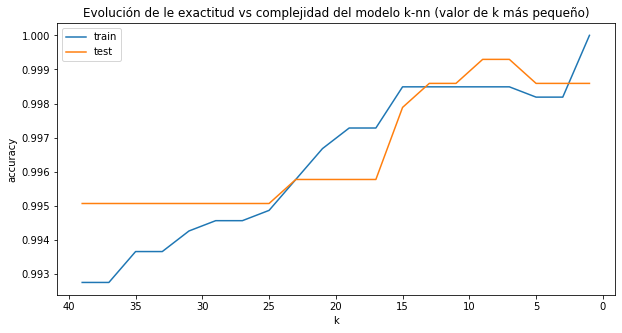

In [41]:
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(k_vec, vec_train)
plt.plot(k_vec, vec_test)
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [62]:
k_best = 8

In [63]:
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [64]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

### Evaluación del modelo

In [65]:
y_test.shape, y_pred.shape

((1420,), (1420,))

([<matplotlib.axis.YTick at 0x1ccacdb8128>,
 <a list of 2 Text yticklabel objects>)

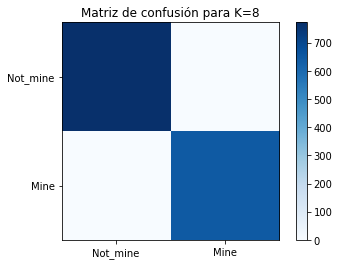

In [66]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.title(f"Matriz de confusión para K={k_best}")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [67]:
pd.DataFrame(churm)

,0,1
0,772,1
1,0,647


In [68]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.9992957746478873
Kappa:  0.9985805507463105


In [69]:
print(colored('Metricas de los registros mineros', attrs=['bold']))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VN = churm[0,0]
FP = churm[0,1]
specificity = VN/(VN+FP)


print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))


Metricas de los registros mineros
Precisión     :  0.9984567901234568
Recall        :  1.0
Especificidad :  0.9987063389391979
F1-score      :  0.9992277992277991


In [70]:
print(colored('Metricas de los registros no mineros', attrs=['bold']))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VN = churm[1,1]
FP = churm[1,0]
specificity = VN/(VN+FP)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Metricas de los registros no mineros
Precisión     :  1.0
Recall        :  0.9987063389391979
Especificidad :  1.0
F1-score      :  0.9993527508090615


# Curva ROC

In [71]:
y_pred_proba = knn.predict_proba(X_test)

In [72]:
lr_probs = y_pred_proba[:,1]

In [73]:
ns_probs = [0 for _ in range(len(y_test))]

In [74]:
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [75]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
lr_auc

0.9999980005238628

In [76]:
#Sumo los scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
KNN: ROC AUC=1.000


In [77]:
ns_fpr, ns_tpr, thresholds  = metrics.roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lr_probs)

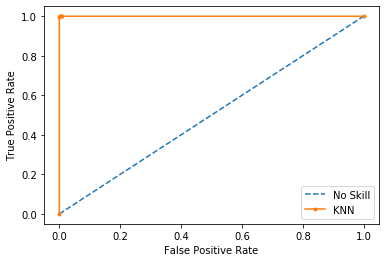

In [78]:
#Plot la roc curva para el modelo
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()